In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
def extract_count_multiple_answer(dataframe, split_sign=';'):
    ''' Returns occurences of all values in certain format, for ex. "a;b;c;d" '''
    return dataframe.str.split(split_sign, expand=True).stack().value_counts()


In [10]:
# I've chosen a StackOverflow Annual Developer Survey from 2022, cause I was curious what's going on in today's IT market
# It has 73268 responses, to 78 questions
df = pd.read_csv('stack_data/survey_results_public.csv')
pd.options.display.max_columns = None
# The first column seems useless, so let's remove it
df = df.drop('ResponseId', axis=1)
df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very un

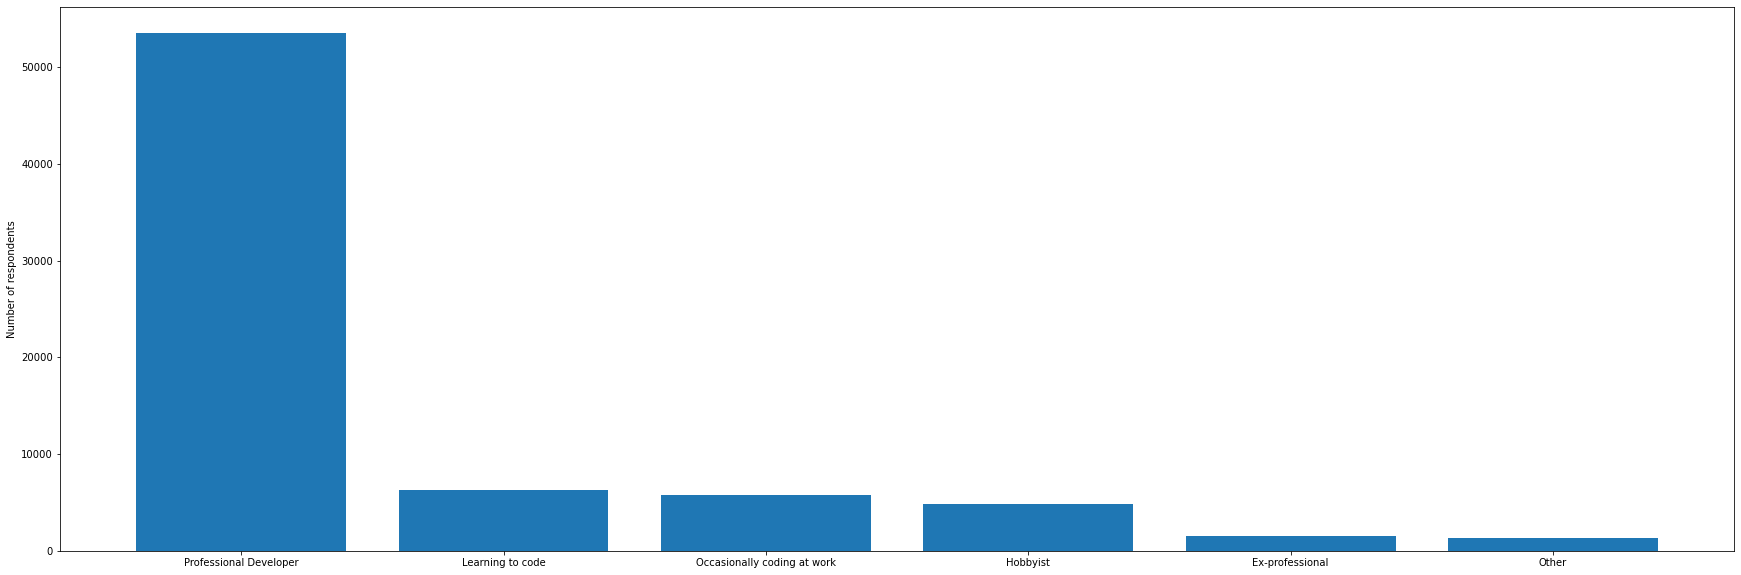

In [11]:
# The survey seems to be quite versatile so I will focus on each aspect that interests me, rather than analysing it as a whole
# Let's start with the first column, so that we can meet our respondents' professional status

fig, ax = plt.subplots(figsize=(30, 10))
ANSWERS = [dict(df[x].value_counts()) for x in df.columns.values.tolist()]

ax.set_ylabel('Number of respondents')
plt.xticks(ticks=range(6) ,labels=('Professional Developer', 'Learning to code', 'Occasionally coding at work', 'Hobbyist', 'Ex-professional', 'Other'))
plt.bar(ANSWERS[0].keys(), ANSWERS[0].values());
# As we can see, the vast majority of respondents work as developers, with the second largets group being people 
# who (likely) aspire to do so

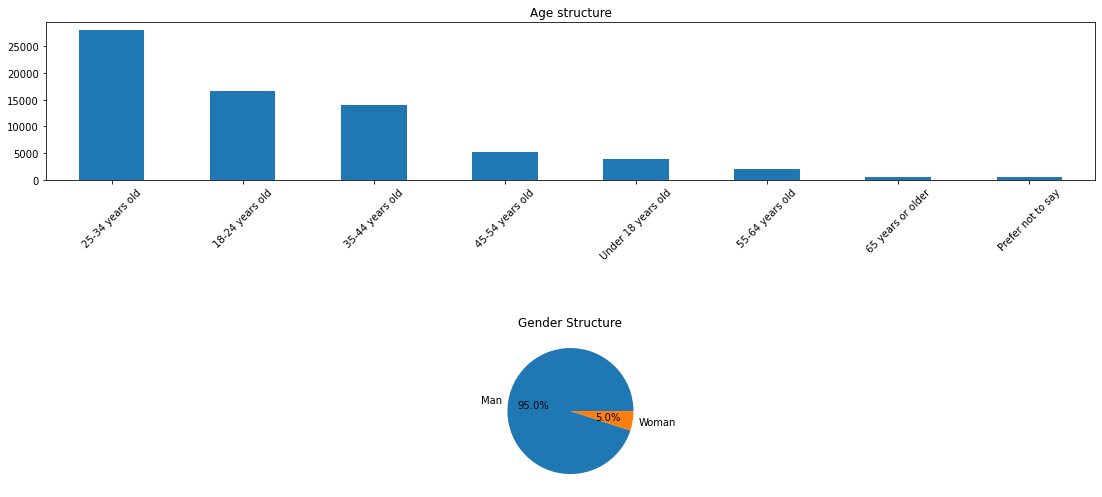

In [12]:
# Let's see the age/gender structure among respondents
fig, axs = plt.subplots(2)
fig.tight_layout(pad=4)

df['Age'].value_counts().plot(kind='bar', ax=axs[0], figsize=(20, 10), rot=45, title='Age structure');
df[(df['Gender'] == 'Man') | (df['Gender'] == 'Woman')]['Gender'].value_counts(normalize=False).plot(kind='pie', ax=axs[1], figsize=(20, 10), xlabel='', ylabel='', title='Gender Structure', autopct='%1.1f%%');

# As we can see, our respondents are predominantly young males (ages 18-34). The gender disproportion IT remains.

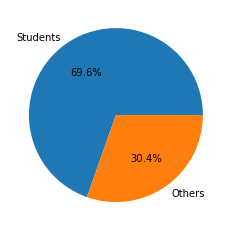

In [13]:
# I will split the analysis into two parts: in the first, I'll mainly investigate people who are learning to code, to get
# some idea of what are the trends in this field and then the rest of analysis will focus on professional developers

# Let's start with finding out how many of these people are college students

learning_to_code_df = df[df['MainBranch']=='I am learning to code']

plt.pie(learning_to_code_df["Employment"].str.contains('Student').value_counts(normalize=True), labels=('Students', 'Others'), autopct='%1.1f%%');

# Almost 70% percent of people learning to code are students


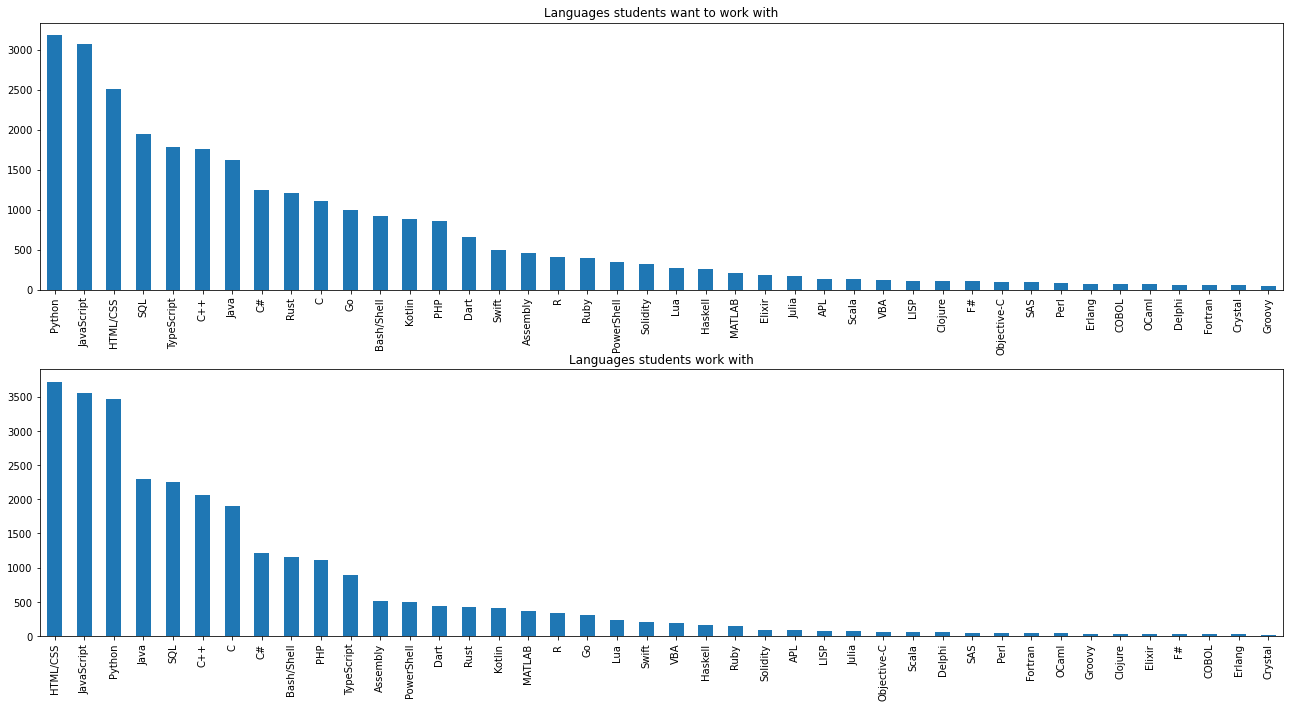

In [14]:
# Let's find out what kind of languages they are trying to learn and run that against the ones they already know

fig, axs = plt.subplots(2)
fig.tight_layout()

extract_count_multiple_answer(learning_to_code_df['LanguageWantToWorkWith']).plot(kind='bar', figsize=(20,10), ax=axs[0], title='Languages students want to work with');

extract_count_multiple_answer(learning_to_code_df['LanguageHaveWorkedWith']).plot(kind='bar', figsize=(20,10), ax=axs[1], title='Languages students work with');
# As we can see, there is a tremendous overlap between these two, which is good - means student go for whaty they want
# One exception being language 'Go' - students want to learn it but not many of them have any experience with it - 
# that strongly suggests that Go will gain popularity in years to come

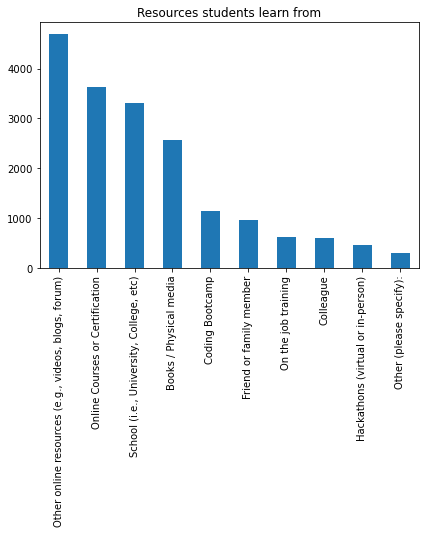

In [18]:
# I think it would be also interesting to find out about resources that are being used by students to learn
fig, axs = plt.subplots()
fig.tight_layout()

extract_count_multiple_answer(learning_to_code_df['LearnCode']).plot(kind='bar', ax=axs, title='Resources students learn from');
# As it can be seen, online resources have overtaken the more traditional knowledge resources such as book, although not by much
# I believe that nowadays most of students use ALL OF THOSE resources, though with different frequency
# It might come as somewhat of a surprise that 

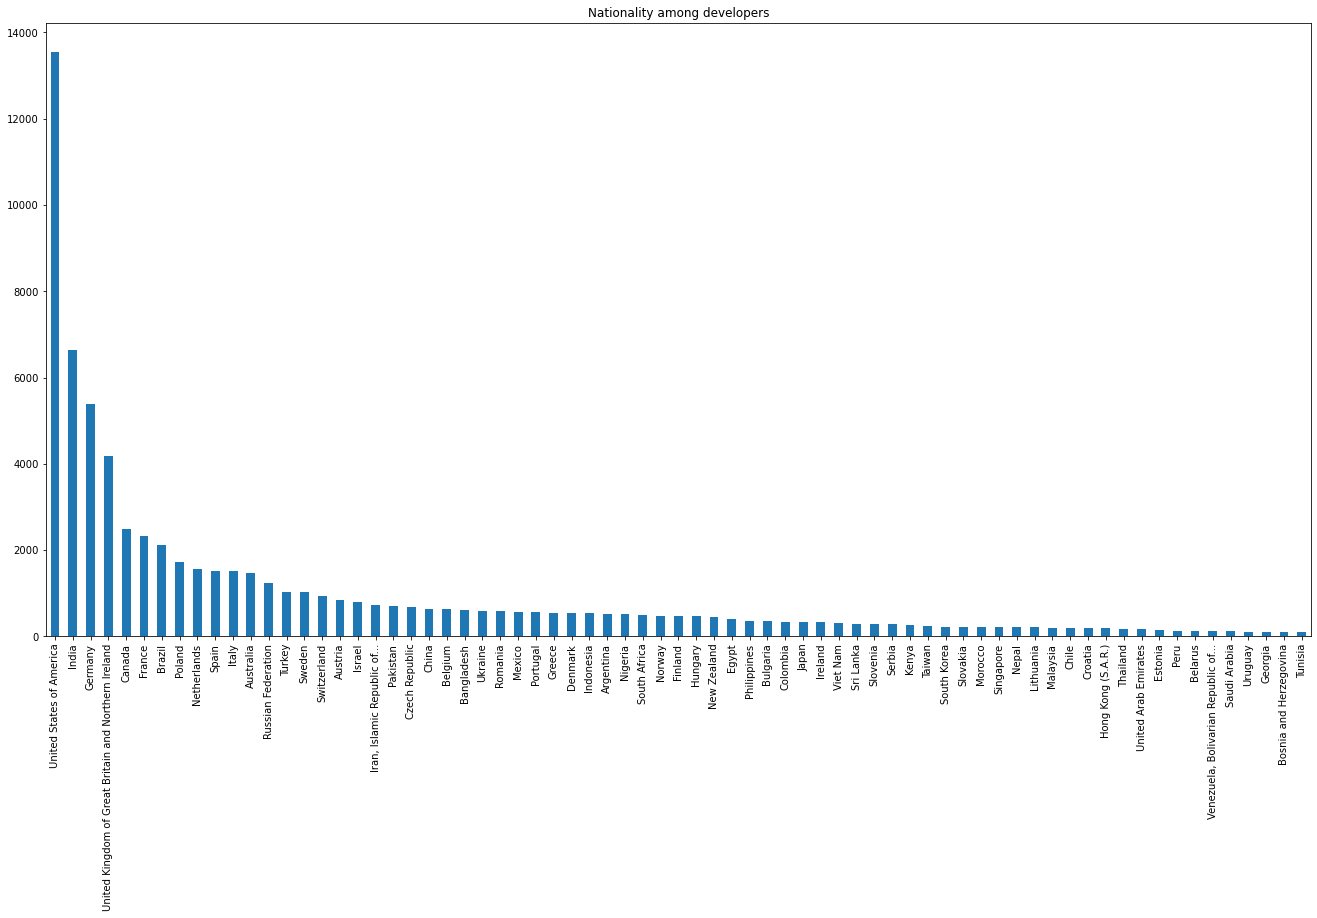

In [16]:
# In this part lets focus on developers. Firstly, let's see what countries are they from, as it will allow us to understand the 
# IT market we're dealing with better. We'll drop values below 100.

fig, axs = plt.subplots()
fig.tight_layout()

extract_count_multiple_answer(df['Country']).loc[lambda x: x > 100].plot(kind='bar', ax=axs, title='Nationality among developers', figsize=(20, 10));
# As we can see, the US leads the board by far margin, and then comes India, Germany and UK - with Poland ranked 8th

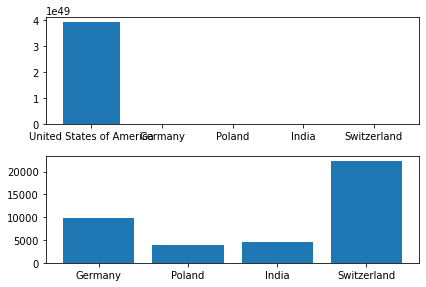

In [75]:
# Now let's plot the average compensation in Poland, US, Germany, Switzerland and India
# It is worth noticing, that in the survey the respondents likely used different currencies, depending on where they live
# I chose dollars as the most universal currency (it is, after all, world's reserve currency)
# The question poses further challenges, as some respondents gave answers to how much they make WEEEKLY, some MONTHLY and rest of them YEARLY
# So all of these had to be taken into account (to make calculations somewhat reliable)
def convert_to_dollars(how_much_money, currency='pln'):
    november_2022_rates = {'eur': 1,
                    'pln': 0.21,
                    'inr': 0.012,
                    'chf': 1.01}
    if currency not in november_2022_rates.keys():
        raise InvalidCurrencyError("there's no such currency dummy")
    return how_much_money * november_2022_rates[currency]

salary_df = df[(df['Country'] == 'United States of America') | (df['Country'] == 'Germany') | (df['Country'] == 'Poland') | (df['Country'] == 'India') | (df['Country'] == 'Switzerland')]

avg_month_salary = {'United States of America':0, 
             'Germany':0,
             'Poland':0,
             'India':0,
             'Switzerland':0}

currencies_tuple = ('eur', 'eur', 'pln', 'inr', 'chf')

# Creating dictionary, in which each country has a dict of its own
for country in avg_salary.keys():
    total_avg = 0
    weekly_monthly_yearly = {'Weekly':0,
                            'Monthly':0,
                            'Yearly':0}
    for period in weekly_monthly_yearly.keys():
        weekly_monthly_yearly[period] = df[(df['Country'] == country) & (df['CompFreq'] == period)]['CompTotal'].mean()
    avg_month_salary[country] = (4 * list(weekly_monthly_yearly.values())[0] + list(weekly_monthly_yearly.values())[1] + list(weekly_monthly_yearly.values())[2]/12)/3

# Thanks to the current financial situation, the euro is almost worth 1 dollar, and so is chf, so i can change values by hand

avg_month_salary['Poland'] = convert_to_dollars(avg_month_salary['Poland'])
avg_month_salary['India'] = convert_to_dollars(avg_month_salary['India'], currency='inr')

fig, axs = plt.subplots(2)
fig.tight_layout()

axs[0].bar(avg_month_salary.keys(), avg_month_salary.values(), align='center');

# As we can see, the result is a total rubbish. After closer examination, it seems that only the result for US seems to be 
# absurd, the rest seems reasonable (maybe except for Switzerland, I'll come back to that)
# Let's try plotting that again, without the US

avg_month_salary.pop('United States of America')

axs[1].bar(avg_month_salary.keys(), avg_month_salary.values(), align='center');

# Now it makes more sense (sadly, looking at Poland) although Switzerland is still suspiciously high-rated compared to the Germany.
# Let's examine the distribution of salaries - I'll also try to answer the question why is US score such an absurd


In [98]:
print('Yearly average is: ' ,df[(df['Country'] == 'Switzerland') & (df['CompFreq'] == 'Yearly')]['CompTotal'].mean())
print(20*'-')
# The yearly average seems reasonable. Let's dig further
print('Weekly average is: ' ,df[(df['Country'] == 'Switzerland') & (df['CompFreq'] == 'Weekly')]['CompTotal'].mean())
# This makes sense as well, cause that gives 3500*4*12 = 168 000 euro yearly. Impressive, but not surprising
print(20*'-')
print('Monthly average is: ' ,df[(df['Country'] == 'Switzerland') & (df['CompFreq'] == 'Monthly')]['CompTotal'].mean())
# Now here we can see the problem. that gives 43000 * 12 = 516 000 which is over half milion euros. There are two possible 
# explainations - either those people who are getting paid monthly are getting extremly overpaid or the respondents have somehow
# misread the question. Calculating the median would help us know wheter we are dealing with some extreme outliers here
print(20*'-')
print('Monthly median is: ' ,df[(df['Country'] == 'Switzerland') & (df['CompFreq'] == 'Monthly')]['CompTotal'].median())
# That seems to be the case. It poses serious questions though, as to the reliability of the previous calculations. Let's see
# them again - this time, using median

Yearly average is:  119084.90281329924
--------------------
Weekly average is:  3500.0
--------------------
Monthly average is:  42986.24615384615
--------------------
Monthly median is:  7350.0


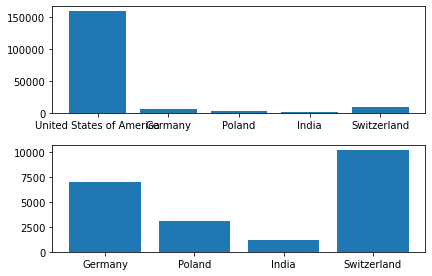

In [101]:
# Repeated code from 2 cells prior - I know it's not the best practice, should've been a function but I consider it too broad

salary_df = df[(df['Country'] == 'United States of America') | (df['Country'] == 'Germany') | (df['Country'] == 'Poland') | (df['Country'] == 'India') | (df['Country'] == 'Switzerland')]

avg_month_salary = {'United States of America':0, 
             'Germany':0,
             'Poland':0,
             'India':0,
             'Switzerland':0}

currencies_tuple = ('eur', 'eur', 'pln', 'inr', 'chf')

for country in avg_salary.keys():
    total_avg = 0
    weekly_monthly_yearly = {'Weekly':0,
                            'Monthly':0,
                            'Yearly':0}
    for period in weekly_monthly_yearly.keys():
        weekly_monthly_yearly[period] = df[(df['Country'] == country) & (df['CompFreq'] == period)]['CompTotal'].median()
    avg_month_salary[country] = (4 * list(weekly_monthly_yearly.values())[0] + list(weekly_monthly_yearly.values())[1] + list(weekly_monthly_yearly.values())[2]/12)/3


avg_month_salary['Poland'] = convert_to_dollars(avg_month_salary['Poland'])
avg_month_salary['India'] = convert_to_dollars(avg_month_salary['India'], currency='inr')

fig, axs = plt.subplots(2)
fig.tight_layout()

axs[0].bar(avg_month_salary.keys(), avg_month_salary.values(), align='center');


avg_month_salary.pop('United States of America')

axs[1].bar(avg_month_salary.keys(), avg_month_salary.values(), align='center');

# Now the result seems much more likely. As we can see, a median gives much clearer (or rather much more realistic) picture as to
# what's going on. 
# The US still puzzles me though. Are they that rich or were some answer unerliable? Let's see..

<AxesSubplot:xlabel='ResponseId', ylabel='CompTotal'>

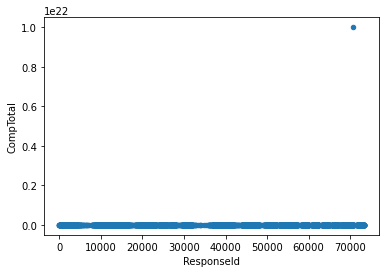

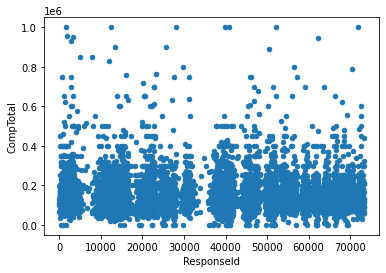

In [112]:
df = pd.read_csv('stack_data/survey_results_public.csv')
df[(df['Country'] == 'United States of America') & (df['CompFreq'] == 'Yearly')].plot(x='ResponseId', y='CompTotal', kind='scatter')
# As we can see, our data is biased by some respondets error (or hillariously funny joke)
# let's filter those responds. Let us assume, that yearly compensation of over 1 milion rarely happens and can be considered an outlier
df[(df['Country'] == 'United States of America') & (df['CompFreq'] == 'Yearly') & (df['CompTotal'] <= 1000000)].plot(x='ResponseId', y='CompTotal', kind='scatter')
# Now that seems much more likely

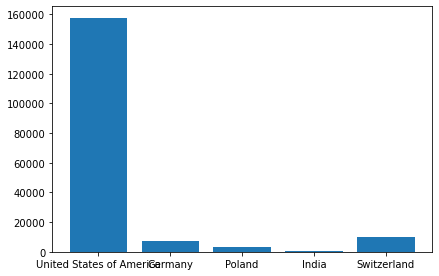

In [117]:
# Let's try to compare salaries for the last time - filtered, using medians
salary_df = df[(df['Country'] == 'United States of America') | (df['Country'] == 'Germany') | (df['Country'] == 'Poland') | (df['Country'] == 'India') | (df['Country'] == 'Switzerland')]

avg_month_salary = {'United States of America':0, 
             'Germany':0,
             'Poland':0,
             'India':0,
             'Switzerland':0}

currencies_tuple = ('eur', 'eur', 'pln', 'inr', 'chf')

for country in avg_salary.keys():
    total_avg = 0
    weekly_monthly_yearly = {'Weekly':0,
                            'Monthly':0,
                            'Yearly':0}
    for period in weekly_monthly_yearly.keys():
        weekly_monthly_yearly[period] = df[(df['Country'] == country) & (df['CompFreq'] == period) & (df['CompTotal'] <= 1000000)]['CompTotal'].median()
    avg_month_salary[country] = (4 * list(weekly_monthly_yearly.values())[0] + list(weekly_monthly_yearly.values())[1] + list(weekly_monthly_yearly.values())[2]/12)/3


avg_month_salary['Poland'] = convert_to_dollars(avg_month_salary['Poland'])
avg_month_salary['India'] = convert_to_dollars(avg_month_salary['India'], currency='inr')

fig, axs = plt.subplots()
fig.tight_layout()

axs.bar(avg_month_salary.keys(), avg_month_salary.values(), align='center');
# Since, according to US official statistics, the average software developer salary in US is around 95k a year, there seems to be
# only one explanation - the Americans are really terrible at filling surveys

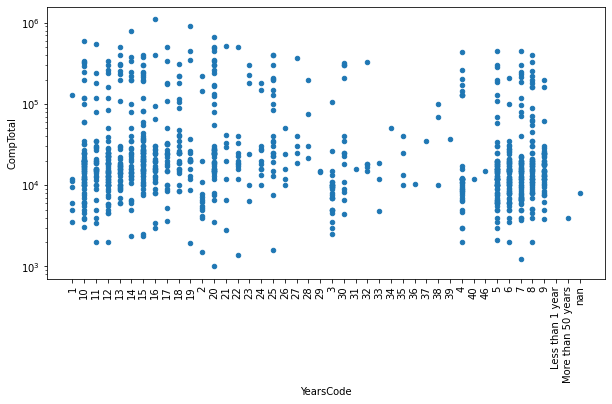

In [150]:
# Now, I will focus on Poland since it is (obviously) the most interesting market to me. Let's see what the plot of years experience
# to salary looks like
df.sort_values(by='YearsCode')
df['YearsCode'] = df['YearsCode'].apply(lambda x: str(x))
df[df['Country'] == 'Poland'].plot(x='YearsCode', y='CompTotal', kind='scatter', rot=90, figsize=(10, 5), logy=True);

# As we can see, there seems to be little connection with experience with coding and salary. Pay notice that the x-axis is not 
# entirely correctly sorted, for that I apologized - I've spent 15 minutes on it and I've given up. I dont think it blurres the
# picture in any way though


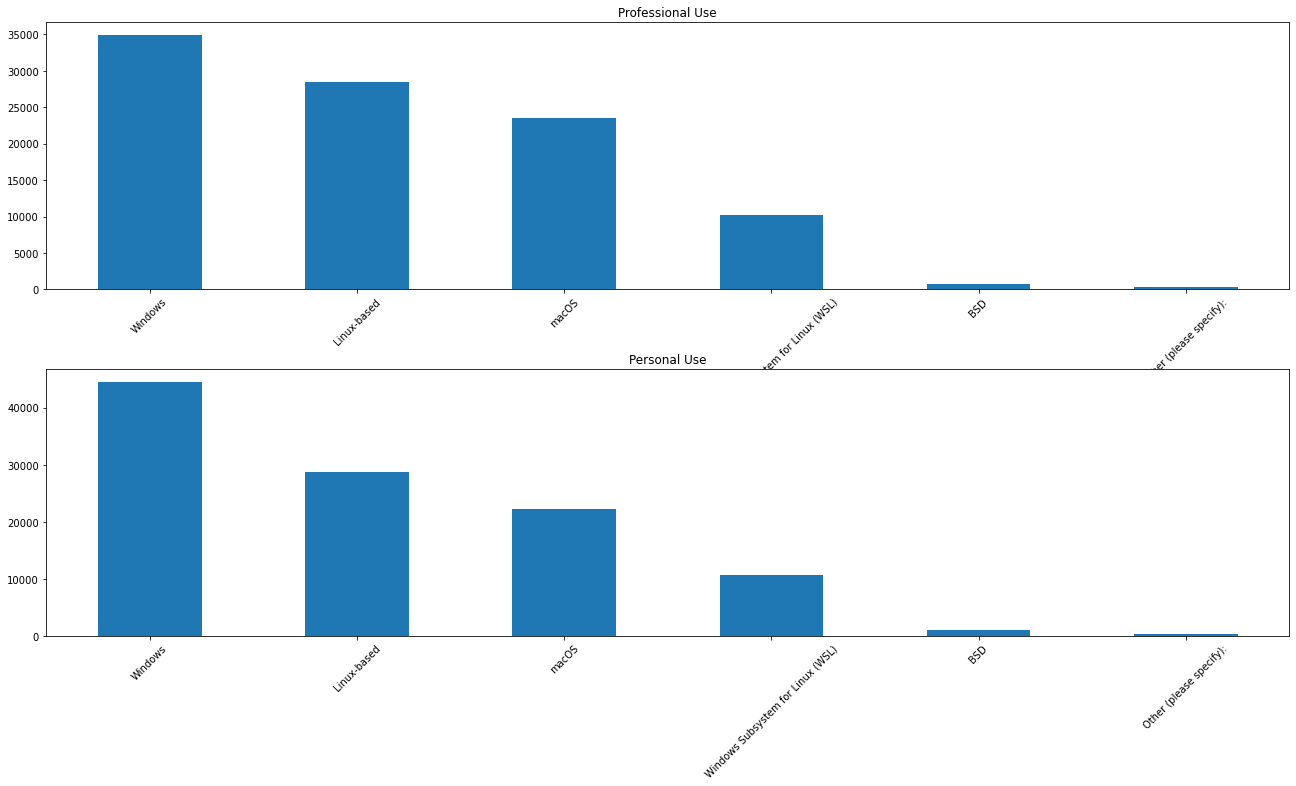

In [158]:
# The final I'd like to answer is the long lasting battle - Windows vs. Linux vs. macOS. 
# Let's see who wins amongst developers OpSysPersonal use
# plt.pie(df["Employment"].str.contains('Student').value_counts(normalize=True), labels=('Students', 'Others'), autopct='%1.1f%%
fig, axs = plt.subplots(2)
fig.tight_layout()

extract_count_multiple_answer(df['OpSysProfessional use']).plot(kind='bar', ax=axs[0], figsize=(20, 10), rot=45, title='Professional Use');
extract_count_multiple_answer(df['OpSysPersonal use']).plot(kind='bar', ax=axs[1], figsize=(20, 10), rot=45, title='Personal Use');

# As we can see, the good old Windows holds the title of most widely used OS. Surprisingly, Linux overtakes macOS in both
# personal and professional use.
# That's the end of my analysis